En este caso de negocio esperamos que nos demuestres tus habilidades para tomar
decisiones, procesar los datos, desarrollar y productivizar modelos, y presentar tus
resultados. Imagina que eres parte del equipo de DS y debes ayudar al negocio a
identificar usuarios fraudulentos siguiendo las indicaciones descritas a continuación:
1. Descarga el dataset adjunto a este correo electrónico
2. Explora los datos y presenta un análisis detallado de ellos
3. Categoriza a los clientes presentes en el dataset según consideres adecuado
4. Desarrolla un modelo capaz de detectar defraudadores a partir de la información disponible
5. Productiviza el modelo que desarrolles en tu local o en la nube
6. Crea una presentación para mostrar tus resultados
7. Carga tu caso de negocio en un repositorio con instrucciones para reproducirlo

In [1]:
import pandas as pd
import ast 

In [2]:
df_orig=pd.read_csv("ds_challenge_data_2024.csv",  encoding='UTF-16')
df=df_orig.copy()

# Análisis de datos

In [3]:
display(df.head())
print(df.shape)

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Farmacia,Tijuana,En proceso,False,0.0,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Aceptada,False,0.0,26.58,False


(26975, 16)


In [7]:
df.dispositivo[0]

"{'año': 2019, 'marca': 'Apple', 'proveedor': 'Telcel'}"

In [4]:
anio=[]
marca=[]
proveedor=[]
for i in range(len(df)):
    str=df.dispositivo[i]
    dic = ast.literal_eval(str) 
    anio += [dic['año']]
    marca += [dic['marca']]
    proveedor += [dic['proveedor']]

In [5]:
df["Disp_Año"]=anio
df["Disp_Marca"]=marca
df["Disp_Proveedor"]=proveedor

In [6]:
display(df.head(2))
print(df.shape)

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,Disp_Año,Disp_Marca,Disp_Proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT


(26975, 19)


## Variable Objetivo

In [8]:
print(df.fraude.value_counts())
print("\n")
print(df.fraude.value_counts(1))

fraude
False    26165
True       810
Name: count, dtype: int64


fraude
False    0.969972
True     0.030028
Name: proportion, dtype: float64


Lo que primero se puede observar es un desbalance entre las clases, dado que cerca del 97% de las transacciones no son fraude y solo 3% si lo son. En el modelado se hará un tratamiento al respecto de estos datos.

Por el momentos se procederá analizar las variables de la base para encontrar cuales son las que nos podrían dar mayor información respecto a las características de las transacciones fraudulentas.

In [9]:
df_fraude=df[df.fraude==True]
df_no_fraude=df[df.fraude==False]
display(df_fraude.head(2))
print(df_fraude.shape)
display(df_no_fraude.head(2))
print(df_no_fraude.shape)

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,Disp_Año,Disp_Marca,Disp_Proveedor
28,29,387,M,32000,40,752.49,02/01/20,2,"{'año': 2015, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Monterrey,Aceptada,False,0.00,22.57,True,2015,Huawei,Telcel
58,59,309,F,74000,32,395.41,02/01/20,4,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Compra en línea,Toluca,Aceptada,False,19.77,11.86,True,2017,Apple,ATT


(810, 19)


,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,Disp_Año,Disp_Marca,Disp_Proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT


(26165, 19)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transaction_id   26975 non-null  int64  
 1   user_id          26975 non-null  int64  
 2   género           26975 non-null  object 
 3   linea_tc         26975 non-null  int64  
 4   interes_tc       26975 non-null  int64  
 5   monto            26975 non-null  float64
 6   fecha            26975 non-null  object 
 7   hora             26975 non-null  int64  
 8   dispositivo      26975 non-null  object 
 9   establecimiento  24036 non-null  object 
 10  ciudad           26641 non-null  object 
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
 16  Disp_Año         26975 non-null  int64  
 17  Disp_Marca  

Solamente "establecimiento" y "ciudad" cuentan con valores nulos a los cuales se les imputaran valores.

In [22]:
print(df.establecimiento.value_counts(1,dropna=False))
print("\n")
print(df.ciudad.value_counts(1,dropna=False))

establecimiento
Tienda departamental    0.256979
Compra en línea         0.245227
Farmacia                0.153735
Supermercado            0.148916
NaN                     0.108953
Abarrotes               0.086191
Name: proportion, dtype: float64


ciudad
Monterrey           0.247340
Guadalajara         0.223318
Nezahualcóyotl      0.159889
Ciudad de México    0.152030
Tijuana             0.087933
Cancún              0.059462
Toluca              0.057646
NaN                 0.012382
Name: proportion, dtype: float64


In [23]:
df.loc[df.establecimiento.isnull(), "establecimiento"]="Otro"
df.loc[df.ciudad.isnull(), "ciudad"]="Otro"

Analizamos el comportamiento de las variables continuas

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

continuas=["linea_tc", "interes_tc", "monto", "dcto", "cashback"]

In [26]:
def plot_corr(cor):
    sns.heatmap(cor, annot = True,  vmin = -1, vmax = 1)
    plt.rcParams['figure.figsize']=(6,6)
    plt.show()

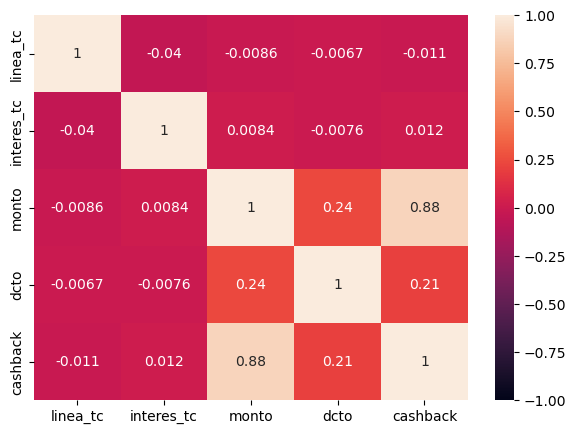

In [29]:
plt.rcParams['figure.figsize'] = (7, 5)
plot_corr(df[continuas].corr())

Es evidente la correlación existente respecto al monto y el cashback, lo cual tiene sentido por como funcionan las tarjetas. Por ello, para el modelo descartaremos la variable de cashback para enfocarnos en el monto.

In [46]:
display(df[continuas].describe())
display(df_fraude[continuas].describe())
display(df_no_fraude[continuas].describe())

,linea_tc,interes_tc,monto,dcto,cashback
count,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000
mean,62476.811863,48.224875,513.796463,5.369477,16.924524
std,21886.892902,9.587256,290.342419,12.322335,10.893845
min,25000.000000,32.000000,1.000000,0.000000,0.030000
25%,44000.000000,40.000000,300.490000,0.000000,9.495000
50%,62000.000000,48.000000,506.380000,0.000000,15.930000
75%,82000.000000,57.000000,716.515000,0.000000,22.830000
max,99000.000000,64.000000,1712.700000,85.640000,109.730000


,linea_tc,interes_tc,monto,dcto,cashback
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,62416.049383,48.054321,578.958272,6.383025,23.548099
std,21746.567902,9.697120,319.178360,14.066990,16.671467
min,25000.000000,32.000000,1.000000,0.000000,0.030000
25%,44000.000000,39.000000,339.947500,0.000000,12.282500
50%,61500.000000,48.000000,572.940000,0.000000,20.660000
75%,83000.000000,57.000000,793.955000,0.000000,30.582500
max,99000.000000,64.000000,1625.160000,67.420000,109.730000


,linea_tc,interes_tc,monto,dcto,cashback
count,26165.000000,26165.000000,26165.000000,26165.000000,26165.000000
mean,62478.692910,48.230155,511.779223,5.338100,16.719476
std,21891.632949,9.583973,289.176350,12.263334,10.599798
min,25000.000000,32.000000,1.000000,0.000000,0.030000
25%,44000.000000,40.000000,299.370000,0.000000,9.430000
50%,63000.000000,48.000000,504.050000,0.000000,15.840000
75%,82000.000000,57.000000,713.780000,0.000000,22.640000
max,99000.000000,64.000000,1712.700000,85.640000,98.740000


Es notorio que la variable "dcto" tiene en más de un 75% de sus valores el número 0 (para ambas clases), por ello desde un principio descarta, dado que no aportaría valos para el análisis.

Unas variables que no se descartarán en primera instancia pero se tendrán en observación para ser descartadas son "linea_tc" y "interes_tc", esto porque  ambas variables tienes una distribución casi igual para el caso de los fraudes y no fraudes.

In [10]:
df.columns

Index(['transaction_id', 'user_id', 'género', 'linea_tc', 'interes_tc',
       'monto', 'fecha', 'hora', 'dispositivo', 'establecimiento', 'ciudad',
       'status_txn', 'is_prime', 'dcto', 'cashback', 'fraude', 'Disp_Año',
       'Disp_Marca', 'Disp_Proveedor'],
      dtype='object')

In [42]:
# print(df.transaction_id.value_counts())
print(df.status_txn.value_counts())
print(df.user_id.value_counts())
print(df['género'].value_counts())
print(df.establecimiento.value_counts())

status_txn
Aceptada      18844
En proceso     5341
Rechazada      2790
Name: count, dtype: int64
user_id
1958    62
320     46
1361    42
2845    42
3678    40
        ..
3799     1
757      1
3887     1
3330     1
2301     1
Name: count, Length: 4000, dtype: int64
género
M    12472
F    12000
N     2503
Name: count, dtype: int64
establecimiento
Tienda departamental    6932
Compra en línea         6615
Farmacia                4147
Supermercado            4017
Otro                    2939
Abarrotes               2325
Name: count, dtype: int64


In [73]:
# sum(df[df.monto>df.linea_tc].values) #Los montos nunca exceden la linea de crédito

Creamos una variable que nos diga cuantas operaciones ha realizado el cliente (sin contemplar fraudes)

In [12]:
df_us=df_no_fraude[['user_id', 'fraude']].groupby(['user_id']).count().reset_index().sort_values(by='fraude', ascending=False).reset_index(drop=True).rename(columns={"fraude":"Txns_Mes"})
display(df_us.head())

,user_id,Txns_Mes
0,1958,61
1,320,44
2,1361,42
3,3678,40
4,2414,39


In [13]:
df_us1=df_no_fraude[['user_id', 'monto', 'hora']].groupby(['user_id']).mean().reset_index()#.sort_values(by='fraude', ascending=False).reset_index(drop=True)
display(df_us1.head())

,user_id,monto,hora
0,0,392.655000,15.500000
1,1,641.768571,14.142857
2,2,548.381429,13.857143
3,3,500.480000,17.500000
4,4,254.010000,14.000000


In [17]:
df=df.merge(df_us, how="left", on = "user_id", suffixes=('', '_calc'))

In [19]:
df=df.merge(df_us1, how="left", on = "user_id", suffixes=('', '_calc'))
display(df.head(1))

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,...,is_prime,dcto,cashback,fraude,Disp_Año,Disp_Marca,Disp_Proveedor,Txns_Mes,monto_calc,hora_calc
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,...,False,0.0,17.43,False,2019,Apple,Telcel,17.0,528.374118,10.705882


In [35]:
df.loc[df.Txns_Mes.isnull(), "Txns_Mes"]=0
#df['Columna1'] = df['Columna1'].fillna(df['Columna2'])
df['monto_calc']=df['monto_calc'].fillna(df['monto'])
df['hora_calc']=df['hora_calc'].fillna(df['hora'])

In [40]:
df.columns

Index(['transaction_id', 'user_id', 'género', 'linea_tc', 'interes_tc',
       'monto', 'fecha', 'hora', 'dispositivo', 'establecimiento', 'ciudad',
       'status_txn', 'is_prime', 'dcto', 'cashback', 'fraude', 'Disp_Año',
       'Disp_Marca', 'Disp_Proveedor', 'Txns_Mes', 'monto_calc', 'hora_calc'],
      dtype='object')

Pasaremos a seleccionar los datos que a analizar en el software de visualización, así como empezar a descartar las variables que no aportan valor al modelo.

Las variables que utilizaremos para el análisis son:
- género
- linea_tc
- interes_tc
- monto
- fecha
- hora
- establecimiento
- ciudad
- is_prime
- Disp_Año
- Disp_Marca
- Disp_Proveedor
- Txns_Mes
- monto_calc
- hora_calc
- fraude --> Variable Objetivo


Las variables que descartamos son:
- transaction_id -- > Dado que es una llave que identifica la transacción
- user_id --> Dado que sirve para identificar al cliente
- dispositivo  --> se generaron columnas nuevas a partir de esta
- status_txn --> Dado que nosotros buscamos aceptar o rechazar, así que solo sesgaría las deciciones del modelo
- dcto --> Se descartó en un principio dada la alta cantidad de valores en 0
- cashback --> Dada la alta correlación con el monto

In [44]:
df2=df[['género', 'linea_tc', 'interes_tc', 'monto', 'fecha', 'hora', 'establecimiento', 'ciudad',
       'is_prime', 'fraude', 'Disp_Año', 'Disp_Marca', 'Disp_Proveedor', 'Txns_Mes', 'monto_calc', 'hora_calc']]

In [45]:
df2.to_excel("Fraude_challenge_2024.xlsx", index=False)

Fin análisis variables.












# Modelo

In [104]:
# v_base=['monto', 'hora', 'establecimiento', 'ciudad', 'Disp_Año', 'Disp_Marca', 'fraude'] #variables seleccionadas por analisis
# n_new=['Txns_Mes', 'monto_calc'] # estas variables deben ser calculadas con el conjunto de prueba

In [3]:
df=df_orig.copy()
display(df.head(2))
print(df.shape)

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False


(26975, 16)


In [4]:
X=df[['user_id', 'monto', 'hora', 'establecimiento', 'ciudad', 'dispositivo']]
y=df.fraude

In [5]:
from sklearn.model_selection import train_test_split

Antes de balancear los datos, dividimos el set con el fin no afectar al conjunto de prueba

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [133]:
# del str

In [29]:
print("El conjunto de entrenamiento cuenta con " +  str(len(y_train)) + " muestras, de las cuales "+ str((y_train.sum())) + 
      " son fraudes, es decir, el " + str(int(((y_train.sum())/len(y_train))*100))+"%.")

El conjunto de entrenamiento cuenta con 21580 muestras, de las cuales 654 son fraudes, es decir, el 3%.


In [30]:
print("El conjunto de prueba cuenta con " +  str(len(y_test)) + " muestras, de las cuales "+ str((y_test.sum())) + 
      " son fraudes, es decir, el " + str(int(((y_test.sum())/len(y_test))*100))+"%.")

El conjunto de prueba cuenta con 5395 muestras, de las cuales 156 son fraudes, es decir, el 2%.


#### Procedemos a generar las variables extras que necesitamos

In [9]:
#convertir diccionario a variables
def dictovar(dfx2):
    dfx=dfx2.copy()
    anio=[]
    marca=[]
    proveedor=[]
    for i in range(len(dfx)):
        str=dfx.dispositivo[i]
        dic = ast.literal_eval(str) 
        anio += [dic['año']]
        marca += [dic['marca']]
        proveedor += [dic['proveedor']]
    dfx["Disp_Año"]=anio
    dfx["Disp_Marca"]=marca
    dfx["Disp_Proveedor"]=proveedor
    return dfx

In [31]:
X_train=dictovar(X_train)

In [11]:
#agregar variable nueva
def newvar(dfx, yx):
    dfxy1=dfx.reset_index()
    yx1=yx.reset_index()
    dfxy1=dfxy1.merge(yx1, how="left", on = "index")
    dfx_no_fraude=dfx[dfxy1.fraude==False]
    
    dfx_m=dfx_no_fraude[['user_id', 'monto']].groupby(['user_id']).mean().reset_index()
    
    dfxout=dfxy1.merge(dfx_m, how="left", on = "user_id", suffixes=('', '_calc'))
    dfxout['monto_calc']=dfxout['monto_calc'].fillna(dfxout['monto'])
    dfxout['ge_monto']=dfxout.monto_calc<dfxout.monto
    dfxout = dfxout.drop(['dispositivo', 'user_id', 'Disp_Proveedor', 'monto_calc', 'fraude', 'index'], axis=1)
    return dfxout, dfx_m
    

In [12]:
#variable nueva para test

def newvar_test(dfxy1, dfx_m2):
    
    dfxout=dfxy1.merge(dfx_m2, how="left", on = "user_id", suffixes=('', '_calc'))
    dfxout['monto_calc']=dfxout['monto_calc'].fillna(dfxout['monto'])
    dfxout['ge_monto']=dfxout.monto_calc<dfxout.monto
    dfxout = dfxout.drop(['dispositivo', 'user_id', 'Disp_Proveedor', 'monto_calc'], axis=1)
    return dfxout

In [32]:
X_train, X_mean=newvar(X_train, y_train)

In [33]:
X_mean.head(2)

,user_id,monto
0,0,285.760
1,1,778.606


In [34]:
display(X_train.head(5))
X_train.shape

,monto,hora,establecimiento,ciudad,Disp_Año,Disp_Marca,ge_monto
0,571.31,12,Abarrotes,Nezahualcóyotl,2017,Samsung,True
1,160.14,18,Supermercado,Guadalajara,2021,Apple,False
2,193.53,5,Compra en línea,Guadalajara,2020,Samsung,False
3,46.58,16,Tienda departamental,Guadalajara,2019,Huawei,False
4,380.04,13,Abarrotes,Monterrey,2020,Motorola,False


(21580, 7)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21579
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monto            21580 non-null  float64
 1   hora             21580 non-null  int64  
 2   establecimiento  19223 non-null  object 
 3   ciudad           21311 non-null  object 
 4   Disp_Año         21580 non-null  int64  
 5   Disp_Marca       21580 non-null  object 
 6   ge_monto         21580 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 1.2+ MB


In [17]:
#llenar vacios
def vacios(dfx):
    dfx3=dfx.copy()
    dfx3.loc[dfx3.establecimiento.isnull(), "establecimiento"]="Otro"
    dfx3.loc[dfx3.ciudad.isnull(), "ciudad"]="Otro"
    return dfx3

In [36]:
X_train=vacios(X_train)#.info()

In [ ]:
# 'monto', 'hora', 'establecimiento', 'ciudad', 'dispositivo'

##### Discretas a dummies

In [37]:
X_train.head(1)

,monto,hora,establecimiento,ciudad,Disp_Año,Disp_Marca,ge_monto
0,571.31,12,Abarrotes,Nezahualcóyotl,2017,Samsung,True


In [38]:
est_dum = pd.get_dummies(X_train.establecimiento)
cid_dum = pd.get_dummies(X_train.ciudad)
marc_dum = pd.get_dummies(X_train.Disp_Marca)

print(est_dum.columns)
print(cid_dum.columns)
print(marc_dum.columns)

Index(['Abarrotes', 'Compra en línea', 'Farmacia', 'Otro', 'Supermercado',
       'Tienda departamental'],
      dtype='object')
Index(['Cancún', 'Ciudad de México', 'Guadalajara', 'Monterrey',
       'Nezahualcóyotl', 'Otro', 'Tijuana', 'Toluca'],
      dtype='object')
Index(['Apple', 'Huawei', 'Motorola', 'Samsung'], dtype='object')


In [39]:
X_train=pd.concat([X_train[['monto', 'hora', 'Disp_Año', 'ge_monto']], 
           est_dum[['Compra en línea', 'Tienda departamental']], 
           cid_dum[['Cancún', 'Ciudad de México', 'Monterrey', 'Tijuana']],
           marc_dum[['Motorola', 'Samsung']]], axis=1)

### Después de varias prueba en la función "discre" se dejan las variables que otorgaron mejores resultados para el modelo

In [40]:
def discre(dfxx):
    dfxx2=dfxx.copy()
    dfxx2['Discretas']=dfxx2['Compra en línea'] + dfxx2['Tienda departamental'] + dfxx2['Cancún'] + dfxx2['Ciudad de México'] + dfxx2.Monterrey + dfxx2.Tijuana + dfxx2.Motorola + dfxx2.Samsung
    dfxx2=dfxx2[['monto', 'hora', 'Disp_Año']]
    return dfxx2

In [41]:
X_train=discre(X_train)

In [42]:
X_train.shape

(21580, 3)

### Utilizamos el siguiente método con el fin de igualar el número de observaciones

In [22]:
# from imblearn.over_sampling import RandomOverSampler

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
smote = SMOTE(sampling_strategy='minority')

In [46]:
smote

SMOTE(sampling_strategy='minority')

In [47]:
X_train, y_train = smote.fit_resample(X_train, y_train)

/home/abramhz/Documentos/Modulo_1/Modulo_1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

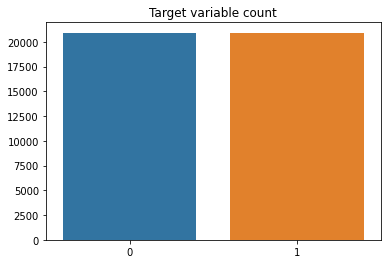

In [48]:
x=y_train.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

## Prueba

### Ajustes

In [49]:
display(X_test.head(3))
print(X_test.shape)
display(y_test.head(3))
print(y_test.shape)

,user_id,monto,hora,establecimiento,ciudad,dispositivo
0,2814,891.37,1,Compra en línea,Monterrey,"{'año': 2020, 'marca': 'Samsung', 'proveedor':..."
1,1255,534.83,22,Supermercado,Ciudad de México,"{'año': 2019, 'marca': 'Samsung', 'proveedor':..."
2,540,461.47,11,Supermercado,Ciudad de México,"{'año': 2020, 'marca': 'Apple', 'proveedor': '..."


(5395, 6)


0    False
1    False
2    False
Name: fraude, dtype: bool

(5395,)


In [50]:
# Diccionario a variables
X_test=dictovar(X_test)

In [51]:
#new_variable
X_test=newvar_test(X_test, X_mean)

In [52]:
# Vacios
X_test=vacios(X_test)#.info()

In [53]:
est_dum = pd.get_dummies(X_test.establecimiento)
cid_dum = pd.get_dummies(X_test.ciudad)
marc_dum = pd.get_dummies(X_test.Disp_Marca)

# print(est_dum.columns)
# print(cid_dum.columns)
# print(marc_dum.columns)

In [54]:
X_test=pd.concat([X_test[['monto', 'hora', 'Disp_Año', 'ge_monto']], 
           est_dum[['Compra en línea', 'Tienda departamental']], 
           cid_dum[['Cancún', 'Ciudad de México', 'Monterrey', 'Tijuana']],
           marc_dum[['Motorola', 'Samsung']]], axis=1)
X_test.head(3)

,monto,hora,Disp_Año,ge_monto,Compra en línea,Tienda departamental,Cancún,Ciudad de México,Monterrey,Tijuana,Motorola,Samsung
0,891.37,1,2020,True,1,0,0,0,1,0,0,1
1,534.83,22,2019,True,0,0,0,1,0,0,0,1
2,461.47,11,2020,False,0,0,0,1,0,0,0,0


In [55]:
X_test=discre(X_test)

In [56]:
X_test.shape

(5395, 3)

#### Prueba Modelo

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [60]:
from sklearn.model_selection import cross_val_score, GridSearchCV

### SCV

In [61]:
svc = SVC()

In [161]:
# svc.get_params()

In [140]:
param_grid={'kernel':['rbf', 'poly'] }

In [141]:
scv_class = GridSearchCV(cv=4, error_score=-1000, estimator=svc, n_jobs=-1, 
                  scoring="f1", param_grid=param_grid, verbose=True)

In [142]:
scv_class.fit(X=X_train, y=y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, error_score=-1000, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly']}, scoring='f1',
             verbose=True)

In [143]:
scv_class.best_score_

0.7673270448206407

In [144]:
scv_class.best_params_

{'kernel': 'rbf'}

In [62]:
scv1=SVC(kernel = 'rbf')
scv1.fit(X_train,y_train)

SVC()

In [63]:
print(classification_report(y_test,scv1.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      0.63      0.77      5239
        True       0.05      0.65      0.09       156

    accuracy                           0.63      5395
   macro avg       0.52      0.64      0.43      5395
weighted avg       0.96      0.63      0.75      5395



In [64]:
confusion_matrix(y_pred=scv1.predict(X_test),y_true=y_test, labels=[True, False])

array([[ 101,   55],
       [1919, 3320]])

### Random Forest

In [56]:
ranf1=RandomForestClassifier(class_weight= 'balanced')
ranf1.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
print(classification_report(y_test,ranf1.predict(X_test)))

              precision    recall  f1-score   support

       False       0.97      0.86      0.91      5239
        True       0.04      0.22      0.07       156

    accuracy                           0.84      5395
   macro avg       0.51      0.54      0.49      5395
weighted avg       0.95      0.84      0.89      5395



In [49]:
confusion_matrix(y_pred=ranf1.predict(X_test),y_true=y_test, labels=[True, False])

array([[  35,  121],
       [ 740, 4499]])

### XGBoost

In [65]:
xgb=XGBClassifier()

In [66]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      0.79      0.87      5239
        True       0.05      0.36      0.09       156

    accuracy                           0.78      5395
   macro avg       0.51      0.57      0.48      5395
weighted avg       0.95      0.78      0.85      5395



In [69]:
confusion_matrix(y_pred=xgb.predict(X_test),y_true=y_test, labels=[True, False])

array([[  56,  100],
       [1095, 4144]])

# Regresión Logística "Modelo seleccionado"

In [70]:
from sklearn.linear_model import LogisticRegression
logistic1=LogisticRegression(solver='liblinear', penalty='l1')
logistic1.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [71]:
print(classification_report(y_test,logistic1.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      0.68      0.80      5239
        True       0.05      0.58      0.09       156

    accuracy                           0.68      5395
   macro avg       0.52      0.63      0.45      5395
weighted avg       0.96      0.68      0.78      5395



# Anexos

In [20]:
# podría considerarse si la persona ha visitado antes ese tipo de estableimiento
df_no_fraude[['user_id', 'establecimiento', 'fraude']].groupby(['user_id', 'establecimiento']).count().reset_index()

,user_id,establecimiento,fraude
0,0,Tienda departamental,2
1,1,Compra en línea,2
2,1,Farmacia,2
3,1,Tienda departamental,3
4,2,Compra en línea,4
...,...,...,...
11307,3998,Abarrotes,3
11308,3998,Compra en línea,2
11309,3999,Compra en línea,1
11310,3999,Farmacia,2


In [45]:
# user=list(df_no_fraude.user_id.value_counts().keys())
# valor=list(df_no_fraude.user_id.value_counts().values)
# df_us=pd.DataFrame()
# df_us['user_id']=user
# df_us['Txns_Mes']=valor
# df_us

In [44]:
ran=RandomUnderSampler()
X_train, y_train= ran.fit_resample(X_train,y_train)

/home/abramhz/Documentos/Modulo_1/Modulo_1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

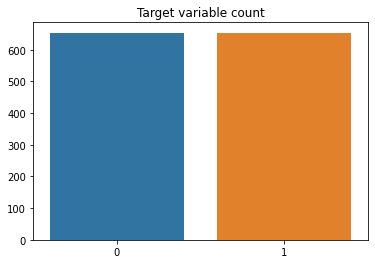

In [50]:
x=y_train.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [110]:
from sklearn.preprocessing import LabelEncoder

dfxx=X_train.copy()

dict_encoder = {}
for col in ["establecimiento", "ciudad", "Disp_Marca"]:
    encoder = LabelEncoder()
    encoder.fit_transform(list(dfxx[col].values))
    dfxx[col] = encoder.transform(dfxx[col].values)
    dict_encoder[col] = encoder 